# Happiness
Data Analyitics COMP47350

Overview:

Step 1: Data Quality Report

Step 2: Data Quality Plan

Step 3: Data Understanding

Step 4: 

Modeling Data - Linear

Modeling Data - Categorical (Logical, Tree, Forest etc)

Step 5: Further analysis / conclusion

## Data Understanding

Import methods:

In [107]:
# Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

# Allows plots to appear directly in the notebook.
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

Import files:

In [108]:

df = pandas.read_csv('processed_data/cleaned_merged_happiness_data.csv' , keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [109]:
df.dtypes

country                               object
year                                   int64
Happiness Score                      float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
Democratic Quality                   float64
Delivery Quality                     float64
GDP                                  float64
Life expectancy birth                float64
Life expectancy age 60               float64
Infant mortality rate                float64
Neonatal mortality rate              float64
Under-five mortality rate            float64
dtype: object

In [110]:
# New DF - Numerical features:
continuous = df.select_dtypes(['int64', 'float64']).columns


Note: All of the data types are continuous features.

Features will need to be classified if a categorical model is to be used to predict the Happiness Score

#### Create training, test and cross validation data sets:

In [111]:
# Randomize the data:
df = df.sample(frac=1).reset_index(drop=True)

In [112]:
# Create a training data set (first 70% of rows)
training_size = int(len(df) * 0.7)
df_train = df[:training_size]
print("Training set size (rows):",len(df_train))

Training set size (rows): 940


In [113]:
# Create a test data set (remaining 30% of rows)
training_size = int(len(df) * 0.7)
df_test = df[training_size:]
print("Test set:",len(df_test))

Test set: 404


In [114]:
# A copy of df for full cross validation purposes
df_cross = df

#### Correlations between all continuous features (Continuous vs continuous):

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5]),
 <a list of 18 Text xticklabel objects>)

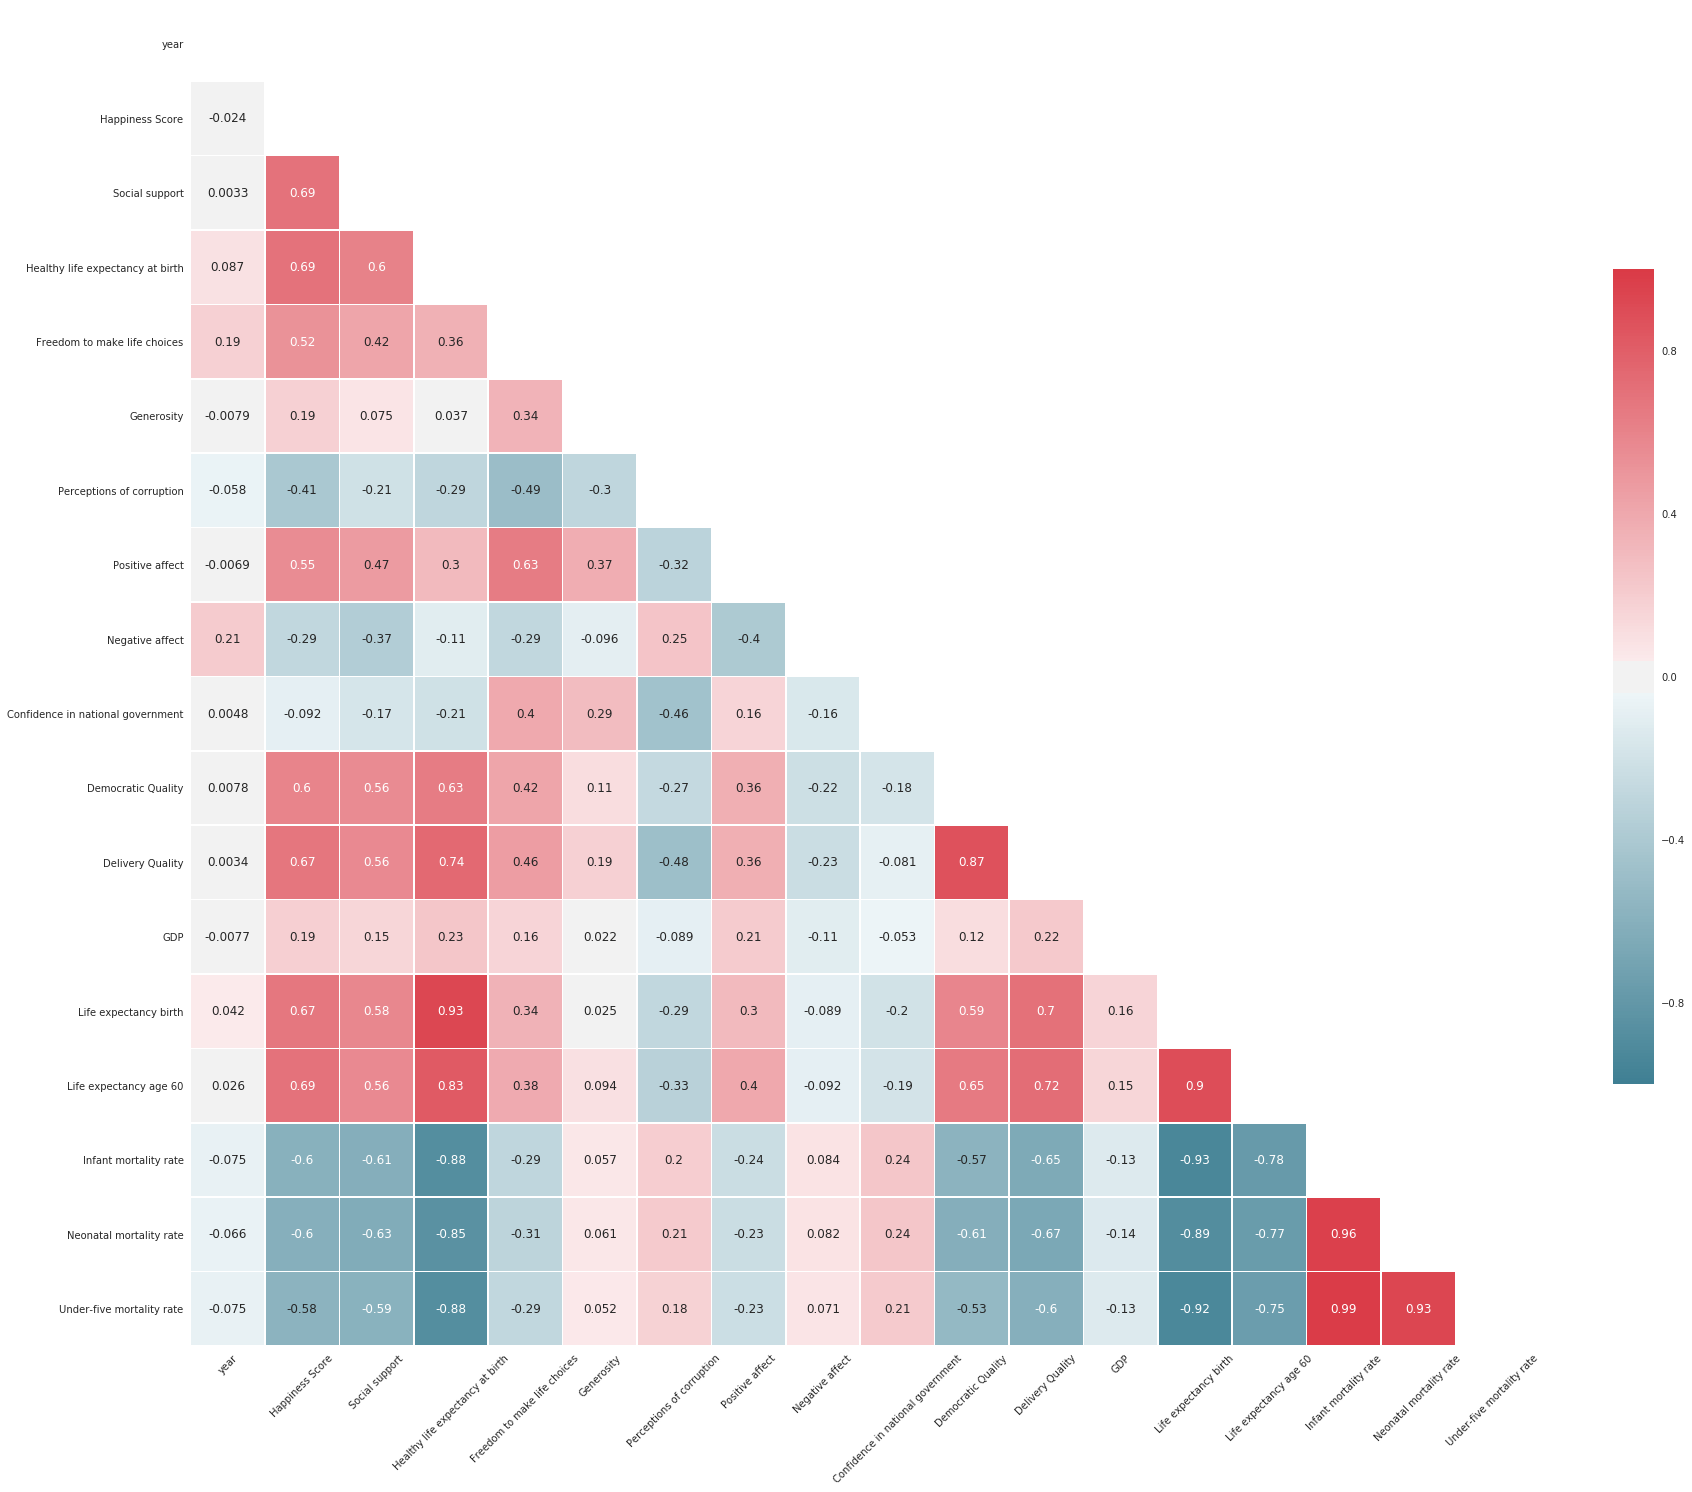

In [115]:
sns.set(style="white")
# Calculate correlation of all pairs of continuous features
corr = df_train[continuous].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

The heatmap above shows the correlation between all continuous features. This is useful for understanding which features affect other features. It is also useful for picking descriptive features to trian a model.

In the context of our dataset so far this means that all of our features are in the heatmap because all of our features are currently continuous.

The following features in df_train have a correlation of 80% or above:

- Delivery quality - Democratic quality
- Life expectancy age 60% - Life expectancy birth


- Neonatal mortality rate - Infant mortality rates
- Under-five mortality rate - Infant mortality rates


- Under-five mortality rate - Neonatal mortality rate


- Life expectancy at birth - Healthy life expectancy at birth
- Life expectancy at age 60 - Healthy life expectancy at birth

The following features in df_train have a correlation of -80% or below:
- Infant mortality rate - Healthy life expectancy at birth
- Neontal mortality rate - Healthy life expectancy at birth
- Under-five mortality rate - Healthy life expectancy at birth


- Infant mortality rate - Life expectancy at birth
- Neontal mortality rate - Life expectancy at birth
- Under-five mortality rate - Life expectancy at birth


Note:

Data understanding also includes an analysis of Categorical vs categorical and Continuous vs categorical features. However, our dataset consists of only contiuous features so this portion of data understanding has been omitted.